# Exploratory Data Analysis

In this project, I have performed multiple data exploratory techniques on the NYCFlights13 dataset.

In [2]:
# Importing necessary librarires:
# Numpy is a library for working with Arrays
import numpy as np
print ("Your numpy version: %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("Your SciPy version: %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Your Pandas version: %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print ("Your Mapltolib version: %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Your Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

import matplotlib.pyplot as plt

Your numpy version: 1.23.5 (need at least 1.7.1)
Your SciPy version: 1.10.0 (need at least 0.12.0)
Your Pandas version:  1.5.3 (need at least 0.11.0)
Your Mapltolib version:  3.7.0 (need at least 1.2.1)
Your Scikit-Learn version:  1.2.1 (need at least 0.13.1)


In [3]:
# Load the dataset
flights_df= pd.read_csv('flights.csv')

In [4]:
# Let's start by looking at some of the structural attributes of the dataset

print (flights_df.shape)   # rows and columns
print (flights_df.columns) # column names
print (flights_df.dtypes)  # data types of each column

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [5]:
# Let's look at the unique destinations of the flights in the data 

a = flights_df.dest.unique()
print(a)

# Let's now look at the top ten rows to get a sense of the data
flights_df.head(10)

['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


## Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

#### (a) How many flights were there from NYC airports to Seattle in 2013?

In [6]:
flights_df1 = flights_df.loc[(flights_df['dest']=='SEA') & (flights_df['origin'].isin(['JFK', 'LGA', 'EWR'])) & (flights_df['year']==2013)]
flights_df1.shape[0]
flights_df1.head(10)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
78,79,2013,1,1,724.0,-1.0,1020.0,-10.0,AS,N594AS,11,EWR,SEA,338.0,2402,7.0,24.0
93,94,2013,1,1,743.0,13.0,1059.0,3.0,DL,N3760C,495,JFK,SEA,349.0,2422,7.0,43.0
165,166,2013,1,1,857.0,6.0,1157.0,-25.0,UA,N45440,1670,EWR,SEA,343.0,2402,8.0,57.0
401,402,2013,1,1,1418.0,-1.0,1726.0,-6.0,UA,N37464,16,EWR,SEA,348.0,2402,14.0,18.0
404,405,2013,1,1,1421.0,26.0,1735.0,26.0,B6,N503JB,83,JFK,SEA,349.0,2422,14.0,21.0
608,609,2013,1,1,1730.0,1.0,2039.0,-19.0,UA,N77296,1715,EWR,SEA,344.0,2402,17.0,30.0
644,645,2013,1,1,1808.0,-7.0,2111.0,-19.0,AS,N553AS,7,EWR,SEA,336.0,2402,18.0,8.0
656,657,2013,1,1,1824.0,-6.0,2203.0,-2.0,AA,N3ETAA,269,JFK,SEA,348.0,2422,18.0,24.0
660,661,2013,1,1,1826.0,-4.0,2154.0,-13.0,DL,N3772H,1643,JFK,SEA,334.0,2422,18.0,26.0
735,736,2013,1,1,1952.0,22.0,2257.0,6.0,UA,N76523,1416,EWR,SEA,342.0,2402,19.0,52.0


#### There were 3923 flights from NYC airports to Seattle in 2013

#### (b) How many airlines fly from NYC to Seattle?

In [7]:
airlines = len(pd.unique(flights_df1['carrier']))
airlines

5

#### There are 5 airlines that fly from NYC to Seattle

#### (c) How many unique air planes fly from NYC to Seattle?

In [8]:
flights = len(pd.unique(flights_df1['tailnum']))
flights

936

#### There are 936 unique airplanes that fly from NYC to Seattle

#### (d) What is the average arrival delay for flights from NC to Seattle?

In [9]:
avg = flights_df1['arr_delay'].mean()
avg

-1.0990990990990992

#### The average arrival delay for flights from NYC to Seattle is -1.099

#### (e) What proportion of flights to Seattle come from each NYC airport? Provide multiple ways of answering the question.

In [10]:
# Method 1: Count of flights from each aiport divided by total count of flights
jfk1 = flights_df1[flights_df1['origin'] == 'JFK']
jfk_prop1 = jfk1.shape[0]/flights_df1.shape[0]
print(jfk_prop1)

lga1 = flights_df1[flights_df1['origin'] == 'LGA']
lga_prop1 = lga1.shape[0]/flights_df1.shape[0]
print(lga_prop1)

ewr1 = flights_df1[flights_df1['origin'] == 'EWR']
ewr_prop1 = ewr1.shape[0]/flights_df1.shape[0]
print(ewr_prop1)
#JFK1 = flights_df1[flights_df1['origin'] == 'JFK']


0.5332653581442773
0.0
0.46673464185572267


In [11]:
# Method 2: Using value_counts()
prop2 = flights_df1['origin'].value_counts(normalize=True) 
prop2

JFK    0.533265
EWR    0.466735
Name: origin, dtype: float64

In [12]:
# Method 3: Using groupby()
prop3 = (flights_df1.groupby('origin').size())/(flights_df1['origin'].count())
prop3

origin
EWR    0.466735
JFK    0.533265
dtype: float64

#### The proportion of flights to Seattle from each NYC airport are as follows: EWR: 0.466735 JFK: 0.533265 LGA: 0.0

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

#### (a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [13]:
large_dep_delay = flights_df.groupby(['year', 'month', 'day']).agg({'dep_delay': 'mean'})
print (large_dep_delay.sort_values(by='dep_delay', ascending=False))

large_arr_delay = flights_df.groupby(['year', 'month', 'day']).agg({'arr_delay': 'mean'})
print (large_arr_delay.sort_values(by='arr_delay', ascending=False))

                dep_delay
year month day           
2013 3     8    83.536921
     7     1    56.233825
     9     2    53.029551
     7     10   52.860702
     12    5    52.327990
...                   ...
     9     5    -0.387797
           6    -0.397927
     11    9    -0.628852
     10    2    -0.919918
     9     24   -1.329832

[365 rows x 1 columns]
                arr_delay
year month day           
2013 3     8    85.862155
     6     13   63.753689
     7     22   62.763403
     5     23   61.970899
     7     10   59.626478
...                   ...
     9     5   -15.540373
           28  -16.371852
           6   -17.895010
     10    1   -18.959375
     9     7   -20.349854

[365 rows x 1 columns]


#### The date which has the largest average departure delay is 03/08/2013 The date which has the largest average arrival delay is 03/08/2013

#### (b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?

In [14]:
worse_dep_delay = flights_df.sort_values(by='dep_delay', ascending=False).head(1)
worse_dep_delay

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
7072,7073,2013,1,9,641.0,1301.0,1242.0,1272.0,HA,N384HA,51,JFK,HNL,640.0,4983,6.0,41.0


#### The date which has the largest average arrival delay is 01/09/2013

#### (c) Are there any seasonal patterns in departure delays for flights from NYC?

In [15]:
winter = flights_df.loc[(flights_df['month'].isin([1, 2, 3]))]
#winter = flights_df.loc[(flights_df['month'].isin[1,2,3])]
print(winter['dep_delay'].describe())

spring = flights_df.loc[(flights_df['month'].isin([4, 5, 6]))]
print(spring['dep_delay'].describe())

summer = flights_df.loc[(flights_df['month'].isin([7, 8, 9]))]
print(summer['dep_delay'].describe())

autumn = flights_df.loc[(flights_df['month'].isin([10, 11, 12]))]
print(autumn['dep_delay'].describe())

count    78146.000000
mean        11.415210
std         37.760857
min        -33.000000
25%         -5.000000
50%         -2.000000
75%         10.000000
max       1301.000000
Name: dep_delay, dtype: float64
count    83129.000000
mean        15.878225
std         44.942818
min        -24.000000
25%         -5.000000
50%         -1.000000
75%         15.000000
max       1137.000000
Name: dep_delay, dtype: float64
count    84448.000000
mean        13.794974
std         42.758840
min        -26.000000
25%         -5.000000
50%         -1.000000
75%         11.000000
max       1014.000000
Name: dep_delay, dtype: float64
count    82798.000000
mean         9.363125
std         33.952901
min        -43.000000
25%         -5.000000
50%         -2.000000
75%          8.000000
max        896.000000
Name: dep_delay, dtype: float64


[Text(0.5, 1.0, 'dep_delay vs month')]

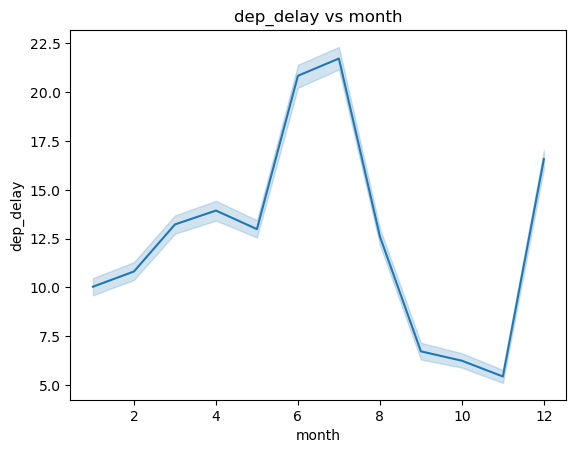

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

flights_df['date1'] = pd.to_datetime(dict(year=flights_df.year, month=flights_df.month, day=flights_df.day, hour=flights_df.day, minute=flights_df.minute))

sns.lineplot(data=flights_df, x="month", y="dep_delay").set(title='dep_delay vs month')

#### There are seasonal patterns for departure delays. The departure delay is the highest in months June and July. And the departure delay is the lowest in months September, October, and November.

#### (d) On average, how do departure delays vary over the course of a day?

[Text(0.5, 1.0, 'dep_delay vs hour')]

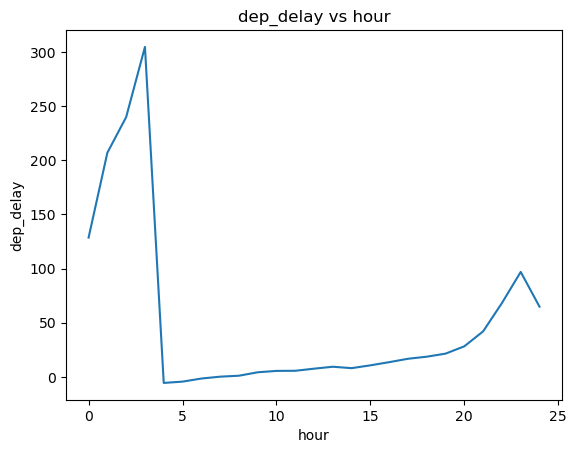

In [17]:
dep_delay_hourly = flights_df.groupby(['hour']).agg({'dep_delay':'mean'})
dep_delay_hourly

sns.lineplot(data=dep_delay_hourly, x="hour", y="dep_delay").set(title='dep_delay vs hour')

#### On an avaergae, the departure delays are maximum in the first 4 hours of the day i.e from 12am to 4am.

## Question 3
#### Which flight departing NYC in 2013 flew the fastest?

In [18]:
flights_df['fastest'] = flights_df['distance']/flights_df['air_time']

fastest_flight = flights_df.sort_values(by='fastest', ascending=False).head(1)
fastest_flight

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,date1,fastest
216447,216448,2013,5,25,1709.0,9.0,1923.0,-14.0,DL,N666DN,1499,LGA,ATL,65.0,762,17.0,9.0,2013-05-26 01:09:00,11.723077


#### The flight N666DN flew the fastest in 2013.

## Question 4
#### Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [19]:
# Dropping duplicates from original dataframe to remove multiple rows of same flight departing on the same day
flights_df2 = flights_df.drop_duplicates(['carrier', 'flight', 'dest', 'year', 'month', 'day'])

# Grouping the dataframe and counting
daily_flights = flights_df2.groupby(['carrier', 'flight', 'dest']).agg({'day':'count'})
print(daily_flights)

# Comparing count with 365, if count is equal to 365 then retrieving flight details
carrier_list = daily_flights[daily_flights['day'] == 365].index.tolist()
print(len(carrier_list))
print(carrier_list)


                     day
carrier flight dest     
9E      2900   BNA    59
        2901   BOS    55
        2902   BOS    55
        2903   BOS    29
               CLT    27
...                  ...
YV      3778   IAD     3
        3788   IAD    23
        3790   IAD     9
        3791   IAD    15
        3799   IAD     1

[11601 rows x 1 columns]
18
[('AA', 59, 'SFO'), ('AA', 119, 'LAX'), ('AA', 181, 'LAX'), ('AA', 1357, 'SJU'), ('AA', 1611, 'MIA'), ('B6', 219, 'CLT'), ('B6', 359, 'BUR'), ('B6', 371, 'FLL'), ('B6', 431, 'SRQ'), ('B6', 703, 'SJU'), ('B6', 1783, 'MCO'), ('DL', 2159, 'MCO'), ('DL', 2391, 'TPA'), ('EV', 5712, 'IAD'), ('UA', 15, 'HNL'), ('VX', 251, 'LAS'), ('VX', 407, 'LAX'), ('VX', 413, 'LAX')]


#### The are 18 flights that fly daily. They fly to the following destinations: SFO, LAX, SJU, MIA, CLT, BUR, FLL, SRQ, MCO, TPA, IAD, HNL, LAS

## Question 5
#### Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.

[Text(0.5, 1.0, 'Proportion of flights having high delay times')]

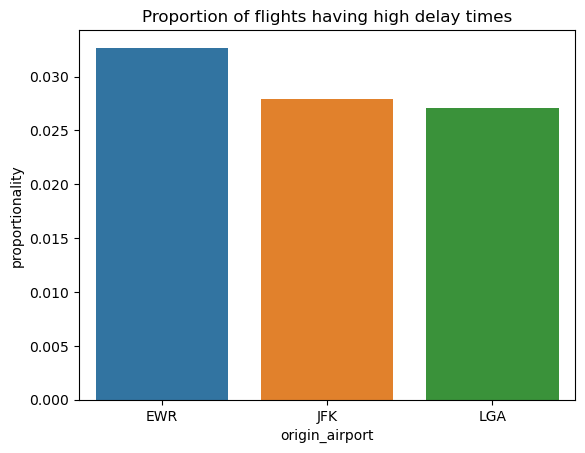

In [20]:
# Which Airport has high departure delay times and how frequently?
import seaborn as sns

#departure = flights_df.groupby(['origin'])
#print(departure)

high_dep_delay = pd.DataFrame()

EWR_data_filtered_all = flights_df.loc[(flights_df['origin']=='EWR')]
JFK_data_filtered_all = flights_df.loc[(flights_df['origin']=='JFK')]
LGA_data_filtered_all = flights_df.loc[(flights_df['origin']=='LGA')]

EWR_data_filtered = flights_df.loc[(flights_df['origin']=='EWR') & (flights_df['dep_delay'] >= 120)]
JFK_data_filtered = flights_df.loc[(flights_df['origin']=='JFK') & (flights_df['dep_delay'] >= 120)]
LGA_data_filtered = flights_df.loc[(flights_df['origin']=='LGA') & (flights_df['dep_delay'] >= 120)]

filtered = flights_df.loc[(flights_df['dep_delay'] >= 120)]
#EWR_data_filtered.shape

high_dep_delay['origin_airport'] = ['EWR','JFK','LGA']
high_dep_delay['high_delay_times'] = [EWR_data_filtered.shape[0], JFK_data_filtered.shape[0], LGA_data_filtered.shape[0]]
high_dep_delay['proportionality'] = [EWR_data_filtered.shape[0]/EWR_data_filtered_all.shape[0], JFK_data_filtered.shape[0]/JFK_data_filtered_all.shape[0], LGA_data_filtered.shape[0]/LGA_data_filtered_all.shape[0]]

#sns.barplot(data=high_dep_delay, x="origin_airport", y="high_delay_times")

sns.barplot(data=high_dep_delay, x="origin_airport", y="proportionality").set(title='Proportion of flights having high delay times')

#g=sns.countplot(data=EWR_data_filtered, x="month") 


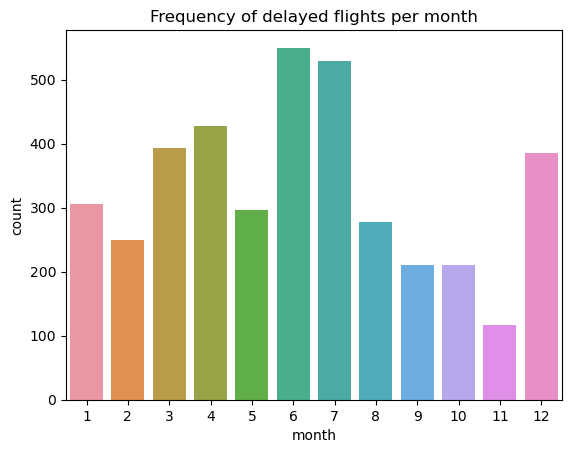

In [21]:
g=sns.countplot(data=EWR_data_filtered, x="month").set(title='Frequency of delayed flights per month')

#### Research Question: Which Airport has high departure delay times and how frequently?

#### Researching this question to find out which airport has high departure delay times and how frequently. This would be useful to the general public in flight bookings, when in a dilemma to choose the origin NYC airport.

#### In the first visualization, I have produced a bar graph displaying the proportion of flights having high delay times (i.e >120). We can tell that EWR has had the most number of flight delays.

#### In the second part of research, I wish to explore how frequently do these delays occur. This is to understand whether these delays occur only during a certain period of the year or throughout the year. If the former is true, then the passengers can avoid travelling via EWR in those months only instead of avoiding the airport entirely. To do so, I have produced a count plot which shows that flights are delayed by 2 hours (or more) very frequently. The count of delayed flights is least (relatively) in November and most (relatively) in June.

## Question 6
#### What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

/var/folders/3c/l6ytm9fn7tvdhs1v5xvjvnh40000gn/T/ipykernel_5043/2441216789.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = merged.groupby(["origin", "year", "month", "day"]).mean()


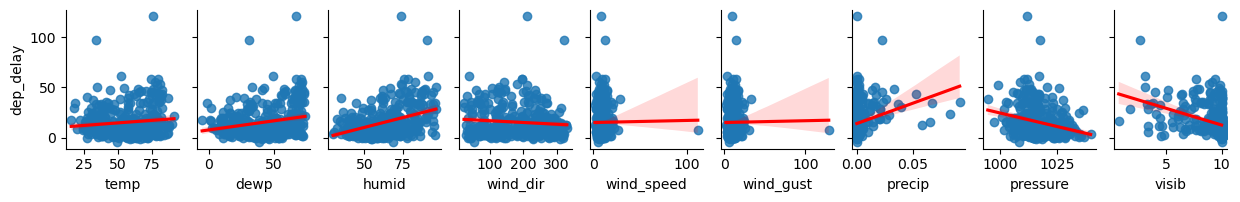

In [22]:
weather_df = pd.read_csv("weather.csv")
#print(weather_df.head(5))
#print(weather_df.describe())

merged = pd.merge(flights_df, weather_df, how="inner", on=["origin", "year", "month", "day", "hour"])
#print(left_merged.head(5))

columns = ["temp", "dewp", "humid", "wind_dir", "wind_speed", "wind_gust", "precip", "pressure", "visib"]

grouped = merged.groupby(["origin", "year", "month", "day"]).mean()

# Plotting the mean of dep_delay against mean of weather condition features 
sns.pairplot(data=grouped, x_vars=["temp", "dewp", "humid", "wind_dir", "wind_speed", "wind_gust", "precip", "pressure", "visib"], y_vars=["dep_delay"], height=2.0, aspect=0.7, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

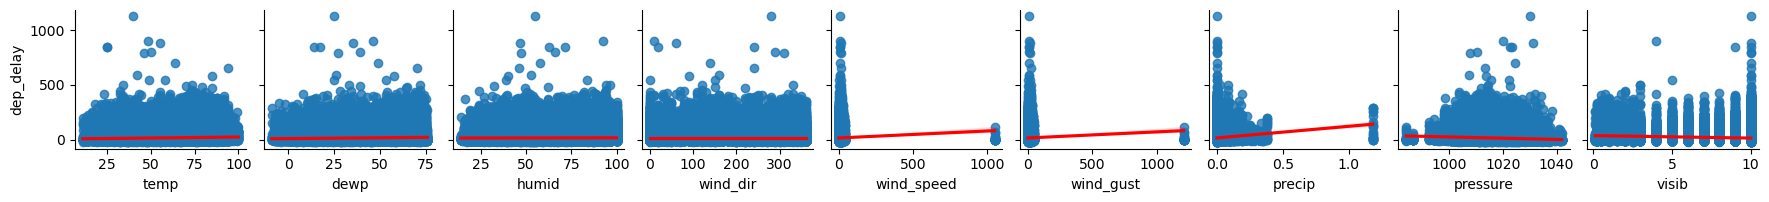

In [23]:
# Plotting all data point to show the association of weather this time with taking mean of features and output variable.
sns.pairplot(data=merged, x_vars=["temp", "dewp", "humid", "wind_dir", "wind_speed", "wind_gust", "precip", "pressure", "visib"] , y_vars=["dep_delay"], height=2.0, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()